### Student Information
Name: 李思叡 (Ray)  
Student ID: 105065702   
GitHub: thisray   

---

### Instructions

- Download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read what the dataset is about on the link provided before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation techniques learned in the [first lab session](https://goo.gl/Sg4FS1) on the new dataset. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 80% of your grade!


- After you have completed the operations, you should attempt the **bonus exercises** provided in the [notebook](https://goo.gl/Sg4FS1) we used for the first lab session. There are six (6) additional exercises; attempt them all, as it is part of your grade (10%). 


- You are also expected to tidy up your notebook and attempt new data operations that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade.


- After completing all the above tasks, you are free to remove this header block and submit your assignment following the guide provided in the `README.md` file of the assignment's [repository](https://github.com/omarsar/data_mining_hw_1). 

In [1]:
"""

dataset from: https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#

Score is either 1 (for positive) or 0 (for negative)

"""
%matplotlib inline

import numpy as np
import pandas as pd

## load dataset
amazon_df = pd.read_csv('./dataset/amazon_cells_labelled.txt', header=None, sep='\t')
imdb_df = pd.read_csv('./dataset/imdb_labelled.txt', header=None, sep='\t')
yelp_df = pd.read_csv('./dataset/yelp_labelled.txt', header=None, sep='\t')

## set columns name
column_name = ['sentence', 'score']
amazon_df.columns = column_name
imdb_df.columns = column_name
yelp_df.columns = column_name


## display & check shape
from IPython.display import display

def for_display(df_var, df_name):
    print ('{}: '.format(df_name))
    print ('{}.shape: {}'.format(df_name, df_var.shape))
    display(df_var.head())
    print ('source count: ')
    display(pd.Series.value_counts(df_var['score']))
    print ('\n')
    
for_display(amazon_df, 'amazon_df')    
for_display(imdb_df, 'imdb_df')    
for_display(yelp_df, 'yelp_df')    


amazon_df: 
amazon_df.shape: (1000, 2)


,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


source count: 


1    500
0    500
Name: score, dtype: int64



imdb_df: 
imdb_df.shape: (748, 2)


,sentence,score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


source count: 


1    386
0    362
Name: score, dtype: int64



yelp_df: 
yelp_df.shape: (1000, 2)


,sentence,score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


source count: 


1    500
0    500
Name: score, dtype: int64

---
#### Exercise 0: 
Experiment with other querying techniques using pandas dataframes. Refer to the their documentation for more information.

In [2]:
## first 5 rows  (0~4)
amazon_df.head()

## last 5 rows
amazon_df.tail()

## the 5~9 rows
amazon_df[5:10]

## "::2" -> 0, 2, 4, 6, 8 ...
## "[:5]" -> first 5 rows
amazon_df.ix[::2, :][:5]

## here only show the last example

,sentence,score
0,So there is no way for me to plug it in here i...,0
2,Great for the jawbone.,1
4,The mic is great.,1
6,If you have several dozen or several hundred c...,0
8,"Needless to say, I wasted my money.",0


---
#### Check missing value  (NaN)

In [3]:
def for_check_nan(df_var, df_name):
    check_df = pd.DataFrame(df_var.isnull())
    print ('{} has NaN: '.format(df_name))
    display(pd.Series.value_counts(check_df['sentence']))
    display(pd.Series.value_counts(check_df['score']))
    print ('\n')

for_check_nan(amazon_df, 'amazon_df')
for_check_nan(imdb_df, 'imdb_df')
for_check_nan(yelp_df, 'yelp_df')

## -> the result means: no NaN in these 3 dataframe

amazon_df has NaN: 


False    1000
Name: sentence, dtype: int64

False    1000
Name: score, dtype: int64



imdb_df has NaN: 


False    748
Name: sentence, dtype: int64

False    748
Name: score, dtype: int64



yelp_df has NaN: 


False    1000
Name: sentence, dtype: int64

False    1000
Name: score, dtype: int64

#### Exercise 1: 
Code for how to calculate the missing values for every record instead of every column. Hint axis parameter. Check the documentation for more information.


In [4]:
def for_check_nan_each_row(df_var, df_name):
    check_df = pd.DataFrame(df_var.isnull())
    
    def count_nan(row):
        count = 0
        for element in row:
            if element:
                count += 1
        return count
    
    check_df['count_nan'] = check_df.apply(lambda x: count_nan(x), axis=1)
    
    display(check_df.head())


for_check_nan_each_row(amazon_df, 'amazon_df')

## -> count NaN in each row and record in 'count_nan' column  (only use 'amazon_df' for example)

,sentence,score,count_nan
0,False,False,0
1,False,False,0
2,False,False,0
3,False,False,0
4,False,False,0


---
#### Dealing with Duplicate Data

In [5]:
sum(amazon_df['sentence'].duplicated())

## ->  result: '10' means there are 10 duplicated rows

10

In [6]:
amazon_df_no_duplicates = amazon_df.drop_duplicates(keep=False, inplace=False)
sum(amazon_df_no_duplicates['sentence'].duplicated())

## -> remove the duplicated rows

0

---
### Data Preprocessing

#### 1 Sampling

In [7]:
## sample 'n=200'

amazon_df_sample = amazon_df.sample(n=200)
for_display(amazon_df_sample, 'amazon_df_sample')

amazon_df_sample: 
amazon_df_sample.shape: (200, 2)


,sentence,score
433,I highly recommend this modest priced cellular...,1
297,This one works and was priced right.,1
219,I'm still infatuated with this phone.,1
710,Can't store anything but phone numbers to SIM.,0
39,worthless product.,0


source count: 


0    101
1     99
Name: score, dtype: int64

#### Exercise 2: 
We can also do a side by side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Look at the Plotly documents for tons of examples and ways to visualizing groups bar charts.

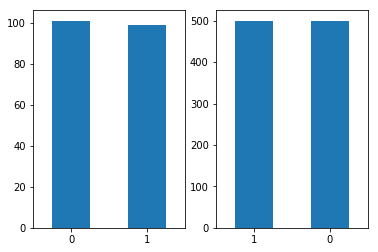

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2)

amazon_df_sample['score'].value_counts().plot(kind="bar", rot=0, ax=axes[0])

amazon_df['score'].value_counts().plot(kind="bar", rot=0, ax=axes[1])


## -> try to show the sample result

---
#### 2 Feature Creation

In [9]:
import nltk

## tokenize_text()  is from 'helper/'
def tokenize_text(text, remove_stopwords=False):
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            tokens.append(word)
    return tokens

amazon_df['unigrams'] = amazon_df['sentence'].apply(lambda x: tokenize_text(x))

amazon_df.head()

## -> try to do tokenize, and store the result in 'unigrams' column

,sentence,score,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,"[The, mic, is, great, .]"


---
#### 3 Feature subset selection

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(amazon_df['sentence'])

analyze = count_vect.build_analyzer()
analyze(" ".join(list(amazon_df[4:5].sentence)))

['the', 'mic', 'is', 'great']

In [11]:
(" ".join(amazon_df[4:5].sentence))

'The mic is great.'

In [12]:
# We can check the shape of this matrix by:
X_counts.shape

(1000, 1847)

In [13]:
# We can obtain the feature names of the vectorizer, i.e., the terms
count_vect.get_feature_names()[0:10]

['10', '100', '11', '12', '13', '15', '15g', '18', '20', '2000']

In [14]:
X_counts[0:2,0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [15]:
## check result
temp_view = pd.DataFrame(X_counts.toarray())
temp_view[temp_view!=0].sum().sum()

## -> try to see how many words in this dataset

9654.0

In [16]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(amazon_df.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()

## -> view 0~19 words' relation with each sentences (doc)

In [17]:
# to plot
import plotly.plotly as py
import plotly.graph_objs as go

import plotly

## plot_heat_map() is from 'helpers/'
def plot_heat_map(plot_x, plot_y, plot_z):
    """ Helper to plot heat map """
    trace = {
        "x": plot_x,
        "y": plot_y,
        "z": plot_z,
        "colorscale": [[0.0, "rgb(158,1,66)"], [0.1, "rgb(213,62,79)"], [0.2, "rgb(244,109,67)"], [0.3, "rgb(253,174,97)"], [0.4, "rgb(254,224,139)"], [0.5, "rgb(255,255,191)"], [0.6, "rgb(230,245,152)"], [0.7, "rgb(171,221,164)"], [0.8, "rgb(102,194,165)"], [0.9, "rgb(50,136,189)"], [1.0, "rgb(94,79,162)"]],
        "type": "heatmap"
    }

    data = go.Data([trace])
    layout = {
        "legend": {
            "bgcolor": "#F5F6F9",
            "font": {"color": "#4D5663"}
        },
        "paper_bgcolor": "#F5F6F9",
        "plot_bgcolor": "#F5F6F9",
        "xaxis1": {
            "gridcolor": "#E1E5ED",
            "tickfont": {"color": "#4D5663"},
            "title": "",
            "titlefont": {"color": "#4D5663"},
            "zerolinecolor": "#E1E5ED"
        },
        "yaxis1": {
            "gridcolor": "#E1E5ED",
            "tickfont": {"color": "#4D5663"},
            "title": "",
            "titlefont": {"color": "#4D5663"},
            "zeroline": False,
            "zerolinecolor": "#E1E5ED"
        }
    }

    fig = go.Figure(data = data, layout=layout)
    return fig

## it's not good to show in jupyter notebook
# py.iplot(plot_heat_map(plot_x, plot_y, plot_z))

#### Exercise 3: 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it.

In [18]:
## ex3
plot_x = ["term_" + str(i) for i in count_vect.get_feature_names()]
plot_y = ["doc_" + str(i) for i in list(amazon_df.index)]
plot_z = X_counts.toarray()

## plot here
# py.iplot(plot_heat_map(plot_x, plot_y, plot_z))

## -> try to show ALL

---
#### 4 Dimensionality Reduction

In [19]:
from sklearn.decomposition import PCA

X_reduced = PCA(n_components=3).fit_transform(X_counts.toarray())
X_reduced.shape

## -> We can use PCA to reduce the dimension of data, 
##    and usually I would use the eigen_value to decide the 'n_components'.

(1000, 3)

---
#### 5 Atrribute Transformation / Aggregation

In [27]:
## count the word frequency, and store in the 'count' column

term_frequencies_df = pd.DataFrame(X_counts.toarray().T)
term_frequencies_df['count'] = term_frequencies_df.sum(axis=0)

print ('shape: ', term_frequencies_df.shape)
term_frequencies_df.head()

shape:  (1847, 1001)


,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,count
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0


In [28]:
X_counts.toarray().shape

(1000, 1847)

#### Exercise 4: 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. You can try to reduce the number of terms you want to visualize as an exercise.

#### Exercise 5: 
Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order.

In [29]:
## try to sort by 'count' column

term_frequencies_df_sort = term_frequencies_df.sort_values(by='count', ascending=False)
term_frequencies_df_sort.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,count
65,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29.0
864,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28.0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28.0
453,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,27.0
581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26.0


<Container object of 1847 artists>

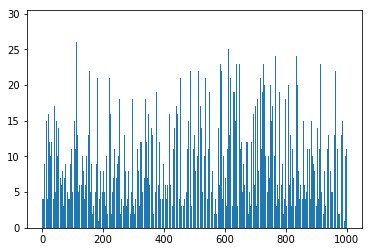

In [30]:
## try to plot
plt.bar(range(len(term_frequencies_df.index)), term_frequencies_df['count'].values)

---
#### 6 Discretization and Binarization

In [24]:
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder

mlb = LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)
mlb.fit(amazon_df.score)

mlb.classes_

array([0, 1])

In [25]:
amazon_df['bin_category'] = mlb.transform(amazon_df['score']).tolist()
amazon_df.head()

## some different with Lab01 content (some problems here?)

,sentence,score,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,"[The, mic, is, great, .]",[1]


In [26]:
## so I use 'OneHotEncoder()'

enc = OneHotEncoder()
amazon_df['one-hot_category'] = enc.fit_transform(amazon_df['score'].values.reshape(-1,1)).toarray().tolist()

amazon_df.head()


## -> this is a method to present the 'catagory data'

,sentence,score,unigrams,bin_category,one-hot_category
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",[0],"[1.0, 0.0]"
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",[1],"[0.0, 1.0]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",[1],"[0.0, 1.0]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",[0],"[1.0, 0.0]"
4,The mic is great.,1,"[The, mic, is, great, .]",[1],"[0.0, 1.0]"


In [ ]:
## end

In [33]:
"""

I think maybe we can use the 'GitHub Organization', and add every classmates in.

Then we can use 'private repository' to push our code to GitHub, and TA still can see them.

It's more convenient to TA, and can avoid homework copy.

"""

print ('thanks!')

thanks!
